# PES University
### Data Analytics: UE18CS312
### Course instructor: Gowri Srinivasa, Professor Dept. of CSE, PES University
<hr>

## Worksheet-3 (Unit 4)
### Compiled by: Amit Kumar ,VII CSE, PES University RR Campus
<hr>

<h3><i>Note: Try it out before viewing the given solution</i></h3>

## Exploring NLP python libraries and word embeddings
<hr>	
   <i>Modules: gensim, nltk, matplotlib</i><br>
   <i>Dataset: brown corpus (Hint: from nltk.corpus import brown)</i>


●	Train a Word2Vec model using the brown corpus. Try to save and load the same model.<br>
●	Get the vector representation of the word ‘university’<br>
●	Compute cosine similarity between words ‘university’ and ‘school’<br>
●	Find the top 3 most similar words to the word ‘university’<br>
●	Find the word that is not supported by the model in the sentence 'breakfast cereal dinner lunch'<br>
●	For the text “Hello Mr. Smith, how are you doing today? The weather is great, and the city is awesome. The sky is pinkish-blue. You shouldn't eat cardboard"<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;○ Perform sentence level tokenization<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;○ Perform word-level tokenization<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;○ Check the frequency distribution of the tokenized words. Which are the 2 most frequent tokens?<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;○ Filter and remove all stop words<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;○ Perform Lexicon Normalisations<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;■ Stemming<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;■ Lemmatization<br>
●	For the text "Albert Einstein was born in Ulm, Germany in 1879." Perform word tokenization and POS tagging.<br>

<hr>

<h2><i>Solution:</i></h2>

In [26]:
import gensim
import warnings
warnings.filterwarnings('ignore')

#### Training the word embedding model using the Brown Corpus:
Experiment with any corpus of your choice, results will depend how good the corpus is

In [27]:
#uncomment and execute if 'brown' corpus is not available 
#import nltk
#nltk.download('brown')
from nltk.corpus import brown
model = gensim.models.Word2Vec(brown.sents())

In [28]:
#Save your trained model
model.save('brown.embedding')
#Load back the same model you just saved
new_model = gensim.models.Word2Vec.load('brown.embedding')

#### The model will be the list of words with their embedding. We can easily get the vector representation of a word.

In [29]:
print("Each word is represented in the space of dimension: ",len(new_model['university']))
new_model['university']

Each word is represented in the space of dimension:  100


array([ 1.0591877e-01, -2.0902918e-01, -5.4805316e-02,  1.9474004e-01,
       -1.2970881e-01, -2.5232121e-02,  3.2675233e-01, -1.7872982e-01,
        2.6662487e-01,  3.6117770e-02, -2.9314941e-01, -9.3895130e-02,
        9.1211393e-02, -4.0565237e-01, -7.2545633e-02, -1.3717866e-01,
       -1.6760167e-01, -1.2838306e-01, -3.5213408e-01,  4.8018083e-02,
        6.6176087e-02,  3.5950652e-01, -1.0214524e-01, -1.6877046e-02,
       -3.7166905e-01, -1.7942935e-01, -1.5372437e-01,  2.2566432e-01,
       -2.2870666e-01, -1.4219090e-01,  1.1435015e-03,  3.5118291e-01,
       -2.1868843e-01,  7.1237996e-02,  1.1971874e-01,  3.0419534e-01,
        2.7712691e-01, -1.5781674e-04,  1.6102745e-01, -6.3972360e-01,
       -1.9311179e-01,  2.3285982e-01,  1.2963521e-01,  5.6302756e-02,
        2.1095984e-01, -3.0621356e-01,  2.4342948e-01,  1.6401596e-01,
        1.8287927e-01, -1.9477774e-01, -1.5077764e-01, -7.3305845e-02,
        1.3548496e-02,  1.3098386e-01, -4.2115670e-02,  2.5740445e-01,
      

#### Compute Cosine Similarity between any 2 words from the corpus

In [30]:
new_model.similarity('university','school')

0.84555167

In [31]:
#you can also check if similarity is above a required threshold
new_model.similarity('university','school') > 0.3

True

#### Finding the top n words that are similar to a target word is simple. The result is the list of n words with the score.

In [32]:
new_model.most_similar(positive=['university'], topn = 3)

[('membership', 0.9627635478973389),
 ('neighborhood', 0.960416316986084),
 ('selection', 0.9570930004119873)]

#### Finding the words that are not supported by the model

In [33]:
new_model.doesnt_match('breakfast cereal dinner lunch'.split())

'cereal'

## Play around with this interactive visualization of Word Embeddings https://projector.tensorflow.org/

### Using NLTK

In [34]:
import os
import nltk
import nltk.corpus

In [35]:
#check the corpuses available to you. 
print("Corpus available: ",os.listdir(nltk.data.find("corpora")))

Corpus available:  ['brown', 'brown.zip', 'indian', 'indian.zip', 'sentiwordnet', 'sentiwordnet.zip', 'stopwords', 'stopwords.zip', 'wordnet', 'wordnet.zip', 'wordnet_ic', 'wordnet_ic.zip']


#### Sentence Tokenization
Sentence tokenizer breaks text paragraph into sentences.

In [36]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


#### Word Tokenization
Word tokenizer breaks text paragraph into words.

In [37]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


#### Frequency Distribution

In [38]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [39]:
#The 2 most frequent words
fdist.most_common(2)

[('is', 3), (',', 2)]

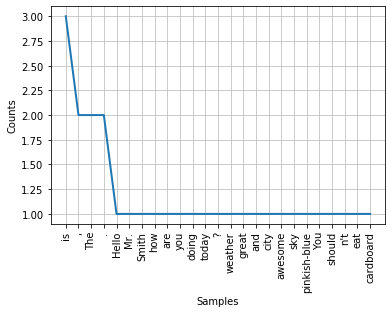

In [40]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

#### Stopwords
Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [41]:
#Check the stopwords that nltk can handle
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'ain', 'my', 'they', 'all', 'or', 'if', 'these', 'than', 'hers', 'having', 'itself', 'his', "you've", 'i', 'both', "haven't", 'myself', 'her', 'how', "mightn't", 'same', 'was', 'now', "mustn't", 'herself', 'that', 'out', 'from', 'won', 'there', 'themselves', 'him', 'you', 'only', "don't", 'few', 'shan', 'over', "won't", 'what', 'aren', 'mightn', 'couldn', "hadn't", 'does', 'an', 'y', 'll', "needn't", 'me', 'because', 'most', 'again', 'have', 'had', 'why', 'didn', 'such', "she's", 'being', 'the', 'further', 'can', 'haven', 've', 'yourself', 'am', "wasn't", 'a', 'against', 'other', 'he', 'in', 'should', 'nor', 'wasn', 'through', 'their', 'any', 'by', 'are', 's', 'while', 'and', 'of', 'our', 'up', 'above', 'own', 'it', 'its', "you'd", 'ours', "you're", "couldn't", "hasn't", 'just', 'd', 'very', 'o', 'were', 'ma', 'whom', 'to', 'no', "doesn't", 'not', 'wouldn', 'under', 'she', 't', 'them', 'those', 'about', 'on', 'below', 'too', "wouldn't", 'we', 'with', 'shouldn', 'some', 'ourselves', 'h

#### Lexicon Normalisation

##### 1. Stemming

In [42]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
#Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


##### 2. Lemmatization

In [43]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


#### POS Tagging
The primary target of Part-of-Speech(POS) tagging is to identify the grammatical group of a given word. Whether it is a NOUN, PRONOUN, ADJECTIVE, VERB, ADVERBS, etc. based on the context. POS Tagging looks for relationships within the sentence and assigns a corresponding tag to the word.

In [44]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."

In [45]:
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [46]:
nltk.pos_tag(tokens)

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]